In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import Flatten, Dense, Embedding
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=10000)

In [3]:
X_train = pad_sequences(X_train, maxlen=200)

In [4]:
X_test = pad_sequences(X_test, maxlen=200)

In [5]:
input_dim=10000

In [6]:
model=Sequential()
model.add(Embedding(input_dim, 128, input_length=200))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

In [8]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/3
625/625 [==============================] - 32s 47ms/step - loss: 0.4015 - accuracy: 0.8023 - val_loss: 0.3061 - val_accuracy: 0.8686
Epoch 2/3
625/625 [==============================] - 29s 46ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.5650 - val_accuracy: 0.8242
Epoch 3/3
625/625 [==============================] - 28s 44ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.6044 - val_accuracy: 0.8468


In [9]:
loss, accuracy = model.evaluate(X_test,y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.6089 - accuracy: 0.8446


In [10]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Loss: 0.6089008450508118
Accuracy: 0.8446000218391418


In [11]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob>0.5).astype(int)

782/782 [==============================] - 6s 7ms/step


In [12]:
print(classification_report(y_test,y_pred,target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.82      0.88      0.85     12500
    Negative       0.87      0.81      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.85      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000



In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11045  1455]
 [ 2430 10070]]


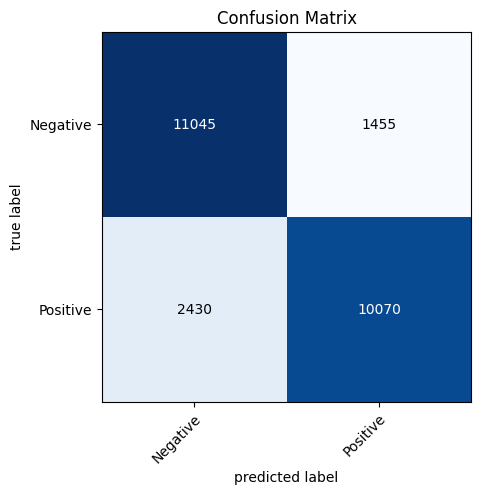

In [14]:
plot_confusion_matrix(cm, class_names=['Negative','Positive'])
plt.title('Confusion Matrix')
plt.show()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 64)                1638464   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,918,529
Trainable params: 2,918,529
Non-trainable params: 0
_________________________________________________________________
